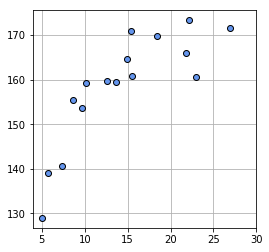

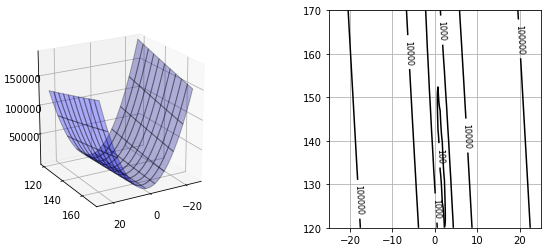

[5046.3  301.8]
繰り返し回数 13820
W=[1.539947, 136.176160]
dMSE=[-0.005794, 0.099991]
MSE=49.027452


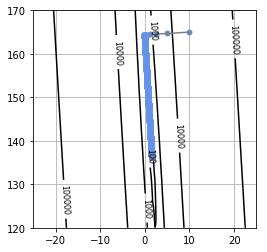

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed=1)
X_min = 4
X_max = 30
X_n = 16
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2]
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) \
    + 4 * np.random.randn(X_n)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)

#print(X)
#print(np.round(X, 2))
#print(np.round(T, 2))

plt.figure(figsize=(4,4))
plt.plot(X, T, marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

# リスト 5-1-(6)
from mpl_toolkits.mplot3d import Axes3D

def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y - t)**2)
    return mse

xn = 100
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, 60)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, J, 30, colors='black', levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.show()

# リスト5-1-(7)
def dmse_line(x, t, w):
    y = w[0] * x + w[1]
    d_w0 = 2 * np.mean((y -t) * x)
    d_w1 = 2 * np.mean(y - t)
    return d_w0, d_w1

# リスト5-1-(8)
d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))

# リスト5-1-(9)
def fit_line_num(x, t):
    w_init = [10.0, 165.0]
    alpha = 0.001
    i_max = 100000
    eps = 0.1
    w_i = np.zeros([i_max, 2])
    w_i[0, :] = w_init
    for i in range(1, i_max):
        dmse = dmse_line(x, t, w_i[i - 1])
        w_i[i, 0] = w_i[i - 1, 0] - alpha * dmse[0]
        w_i[i, 1] = w_i[i - 1, 1] - alpha * dmse[1]
        if max(np.absolute(dmse)) < eps:
            break
    w0 = w_i[i, 0]
    w1 = w_i[i, 1]
    w_i = w_i[:i, :]
    return w0, w1, dmse, w_i

plt.figure(figsize=(4,4))
xn = 100
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
cont = plt.contour(xx0, xx1, J, 30, colors='black', levels=(100, 1000, 10000, 100000))
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)

W0, W1, dMSE, W_history = fit_line_num(X, T)
print('繰り返し回数 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-', color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()